In [15]:
import os
os.chdir(r"C:\OneDrive\华莱士\Documents\office培训\PYTHON培训\第6周")
#设置路径

# 读取文本内容

mytext = open("HLS微博评论收集.TXT", encoding='UTF-8').read()
# 读取文件
print(mytext[0:99]) #全部 print 出来太多了，先看一下前100字吧

虽然味道确实不如kfc麦计，但是价格确实亲民
怎么聊到食品味道上了

我记得华莱士被诟病的是环境卫生吧
华莱士是真的香，套餐也便宜，绝了，学生党的福音。尤其是放学那会饿到爆炸
10块3个的不好找
我


In [2]:
import jieba.analyse
for keyword, weight in jieba.analyse.extract_tags(mytext, topK=30, withWeight=True):
    print('%s %s' % (keyword, weight))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\YAO\AppData\Local\Temp\jieba.cache
Loading model cost 2.490 seconds.
Prefix dict has been built successfully.


华莱士 0.5754975897952037
汉堡 0.39144065809749007
好吃 0.18837254718380816
肯德基 0.18596010554606923
麦当劳 0.11573864136862604
真的 0.07415492034241074
便宜 0.07402681857744682
一次 0.06981023643342048
炸鸡 0.06648705232329608
味道 0.06480981273261088
德克士 0.05770855284574468
觉得 0.056595590595185714
难吃 0.05457442941954562
拉肚子 0.05111539258891092
喜欢 0.038044675606155785
但是 0.03762738003137396
鸡肉 0.03581293802836098
还是 0.032329424487414354
薯条 0.030008447479787235
时候 0.029385568097857917
确实 0.028925730573977643
感觉 0.02848203968638298
不是 0.028016988077046518
一个 0.027941814545104575
面包 0.026614535415546342
卫生 0.02661397953270826
口感 0.025744638524972954
快餐 0.025164790528218538
鸡腿 0.02513417051583123
全鸡 0.02371122295923188


In [13]:
import wordcloud
wc = wordcloud.WordCloud(font_path=r"C:\Windows\Fonts\simhei.ttf",  #使用字体
                         width=2000,# width:绘图区宽度，默认400，整型
                         height=2000,# height:绘图区高度，默认200，整型
                         background_color="white", #背景颜色
                         max_words=200, #显示最大词数
                        ).generate(mytext)

Populating the interactive namespace from numpy and matplotlib


(-0.5, 1999.5, 1999.5, -0.5)

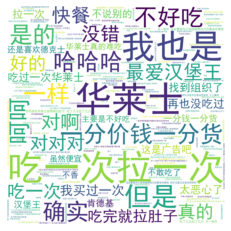

In [14]:
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [8]:
image_binary = wc.to_image()
import io,base64
from urllib.parse import quote
from flask import Flask,send_file
app = Flask(__name__)

@app.route('/')
def word_cloud(is_debug = '1'):
    img = wc.to_image()
    output_buffer = io.BytesIO()
    img.save(output_buffer, format='png')

    if is_debug == '1':
        # image file response
        output_buffer.seek(0)
        return send_file(output_buffer, mimetype='image/png', attachment_filename='your.png', as_attachment=True)
    # base64 image string response
    binary_data = output_buffer.getvalue()
    base64_data = base64.b64encode(binary_data)
    image_64 = 'data:image/png;base64,' + quote(base64_data)
    return image_64

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
